In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
assert os.path.basename(os.getcwd()) == "element-moseq", (
    "Please move to the " + "element directory"
)

In [2]:
import datajoint as dj
from pathlib import Path

In [3]:
dj.config.load("dj_local_conf.json")

In [4]:
dj.conn()

[2023-12-18 22:09:52,236][INFO]: Connecting milagros@db.datajoint.com:3306
[2023-12-18 22:09:53,727][INFO]: Connected milagros@db.datajoint.com:3306


DataJoint connection (connected) milagros@db.datajoint.com:3306

In [5]:
from tutorial_pipeline import lab, subject, session, train, Device

[2023-12-18 22:10:01,266][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.


In [6]:
# train.BodypartsParamSet.drop()
# train.PoseEstimationMethod.drop()
# train.KeypointsSet.drop_quick()
# train.RecordingInfo.drop_quick()
# train.VideoSet.VideoIndex.delete(force=True)
# train.VideoSet.drop()


In [7]:
#dj.Diagram(subject) + dj.Diagram(session) + dj.Diagram(train)
#dj.Diagram(session) + dj.Diagram(train)

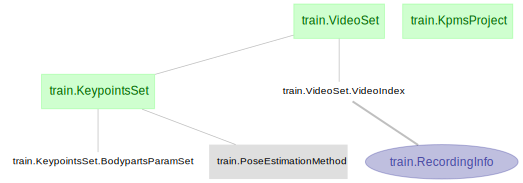

In [8]:
dj.Diagram(train)

In [9]:
train.VideoSet()

subject,session_datetime,videoset_id,device,"videoset_path file path of the video, relative to root data directory"
subject1,2021-06-02 14:04:22,1,Camera1,./input_data/videos


In [10]:
# Subject and Session tables
subject.Subject.insert1(
    dict(
        subject="subject1",
        sex="F",
        subject_birth_date="2020-01-01",
        subject_description="test",
    ),
    skip_duplicates=True,
)

#Definition of the dictionary named "session_keys"
session_keys = [
    dict(subject="subject1", session_datetime="2021-06-02 14:04:22"),
    dict(subject="subject1", session_datetime="2021-06-03 14:43:10"),
]

#Insert this dictionary in the Session table
session.Session.insert(session_keys, skip_duplicates=True)

In [11]:
Device()

device,modality,description
Camera1,Pose Estimation,Panasonic HC-V380K
Camera2,Pose Estimation,Panasonic HC-V770K


In [12]:
recording_key = dict(subject="subject1",
            session_datetime="2021-06-02 14:04:22",
            videoset_id=1)
train.VideoSet.insert1({**recording_key, 
                            "videoset_path":"./input_data/videos",
                             "device":"Camera1"},
                            skip_duplicates=True)

In [13]:
train.VideoSet()

subject,session_datetime,videoset_id,device,"videoset_path file path of the video, relative to root data directory"
subject1,2021-06-02 14:04:22,1,Camera1,./input_data/videos


In [14]:
video_files = ["./input_data/videos/21_11_8_one_mouse.top.ir.Mp4",
               "./input_data/videos/21_12_2_def6a_1.top.ir.mp4",
               "./input_data/videos/21_12_2_def6b_2.top.ir.mp4"]

train.VideoSet.VideoIndex.insert(
    ({**recording_key, "video_id":v_idx, "video_path":Path(f)}
    for v_idx, f in enumerate(video_files)),skip_duplicates=True
)

In [15]:
train.VideoSet()

subject,session_datetime,videoset_id,device,"videoset_path file path of the video, relative to root data directory"
subject1,2021-06-02 14:04:22,1,Camera1,./input_data/videos


In [16]:
train.RecordingInfo()

subject,session_datetime,videoset_id,video_id,px_height height in pixels,px_width width in pixels,nframes number of frames,fps (Hz) frames per second,recording_datetime Datetime for the start of the recording,recording_duration video duration (s) from nframes / fps


In [ ]:
# train.RecordingInfo.populate()
# train.RecordingInfo()

In [17]:
recording_key

{'subject': 'subject1',
 'session_datetime': '2021-06-02 14:04:22',
 'videoset_id': 1}

In [18]:
train.KeypointsSet()

subject,session_datetime,videoset_id,kpset_id,"kpset_path keypoints path of the pose estimation method, relative to root","config_path config file path of the pose estimation method, relative to root",kp_description Optional. User-entered description.
subject1,2021-06-02 14:04:22,1,1,./input_data/videos/,./data/inbox/input_data/config.yaml,first test


In [19]:
# Insert data in KeypointsSet table
kpset_key = {**recording_key,"kpset_id":1}
train.KeypointsSet.insert1({**kpset_key,
                            "kpset_path":"./input_data/videos/",
                            "config_path":"./data/inbox/input_data/config.yaml",
                            "kp_description":"first test"},
                            skip_duplicates=True)



In [20]:
train.KeypointsSet()

subject,session_datetime,videoset_id,kpset_id,"kpset_path keypoints path of the pose estimation method, relative to root","config_path config file path of the pose estimation method, relative to root",kp_description Optional. User-entered description.
subject1,2021-06-02 14:04:22,1,1,./input_data/videos/,./data/inbox/input_data/config.yaml,first test


In [21]:
train.PoseEstimationMethod()

subject,session_datetime,videoset_id,kpset_id,method_id,format pose estimation method,extension
subject1,2021-06-02 14:04:22,1,1,1,deeplabcut,h5


In [22]:
# Insert data in PoseEstimationMethod table
train.PoseEstimationMethod.insert1({**kpset_key,
                                    "method_id":1, 
                                    "format":"deeplabcut",
                                    "extension":"h5"}, 
                                    skip_duplicates=True)

In [23]:
train.PoseEstimationMethod()

subject,session_datetime,videoset_id,kpset_id,method_id,format pose estimation method,extension
subject1,2021-06-02 14:04:22,1,1,1,deeplabcut,h5


In [24]:
train.KeypointsSet.BodypartsParamSet()

subject,session_datetime,videoset_id,kpset_id,bodypartset_id,anterior_bodyparts list of strings of anterior bodyparts,posterior_bodyparts list of strings of posterior bodyparts,use_bodyparts list of strings of bodyparts to be used


In [25]:
# Insert data in BodypartsParamset table
train.KeypointsSet.BodypartsParamSet.insert1({
    **kpset_key,
    "bodypartset_id":1,
    "anterior_bodyparts":["nose"],
    "posterior_bodyparts":["spine4"],
    "use_bodyparts":['spine4', 'spine3', 'spine2', 'spine1',
    'head', 'nose', 'right ear', 'left ear']
    })

OperationalError: (1241, 'Operand should contain 1 column(s)')